# Word and Sentence similarity with spaCy

In [3]:
!python -m spacy download de_core_news_lg


    Compatibility error
    No compatible model found for 'de_core_news_lg' (spaCy v2.0.18).



In [2]:
import spacy
import de_core_news_lg
nlp = de_core_news_lg.load()

# Word embeddings

Es gibt die Möglichkeit Dokumenten/Satz Ähnlichkeit "präziser" zu bestimmen indem wir eigene sog. Word embeddings benutzen,
- https://spacy.io/usage/vectors-similarity
- https://fasttext.cc/docs/en/crawl-vectors.html

Was zum Teufel sind Word Embeddings?

![Word Embeddings](embedding.png)

# Wortebene

In [4]:
tokens = nlp("König Königin Mann Frau Hund Katze")
for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

König True 43.84337 False
Königin True 33.68398 False
Mann True 56.765003 False
Frau True 61.484547 False
Hund True 57.446507 False
Katze True 43.214478 False


In [7]:
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

König König 1.0
König Königin 0.7748912
König Mann 0.42440188
König Frau 0.25280464
König Hund 0.19055419
König Katze 0.12860915
Königin König 0.7748912
Königin Königin 1.0
Königin Mann 0.38562852
Königin Frau 0.4270199
Königin Hund 0.13106039
Königin Katze 0.28223303
Mann König 0.42440188
Mann Königin 0.38562852
Mann Mann 1.0
Mann Frau 0.65040565
Mann Hund 0.5162665
Mann Katze 0.32687107
Frau König 0.25280464
Frau Königin 0.4270199
Frau Mann 0.65040565
Frau Frau 1.0
Frau Hund 0.26074535
Frau Katze 0.39520243
Hund König 0.19055419
Hund Königin 0.13106039
Hund Mann 0.5162665
Hund Frau 0.26074535
Hund Hund 1.0
Hund Katze 0.6760826
Katze König 0.12860915
Katze Königin 0.28223303
Katze Mann 0.32687107
Katze Frau 0.39520243
Katze Hund 0.6760826
Katze Katze 1.0


## Visualisieren mit PCA

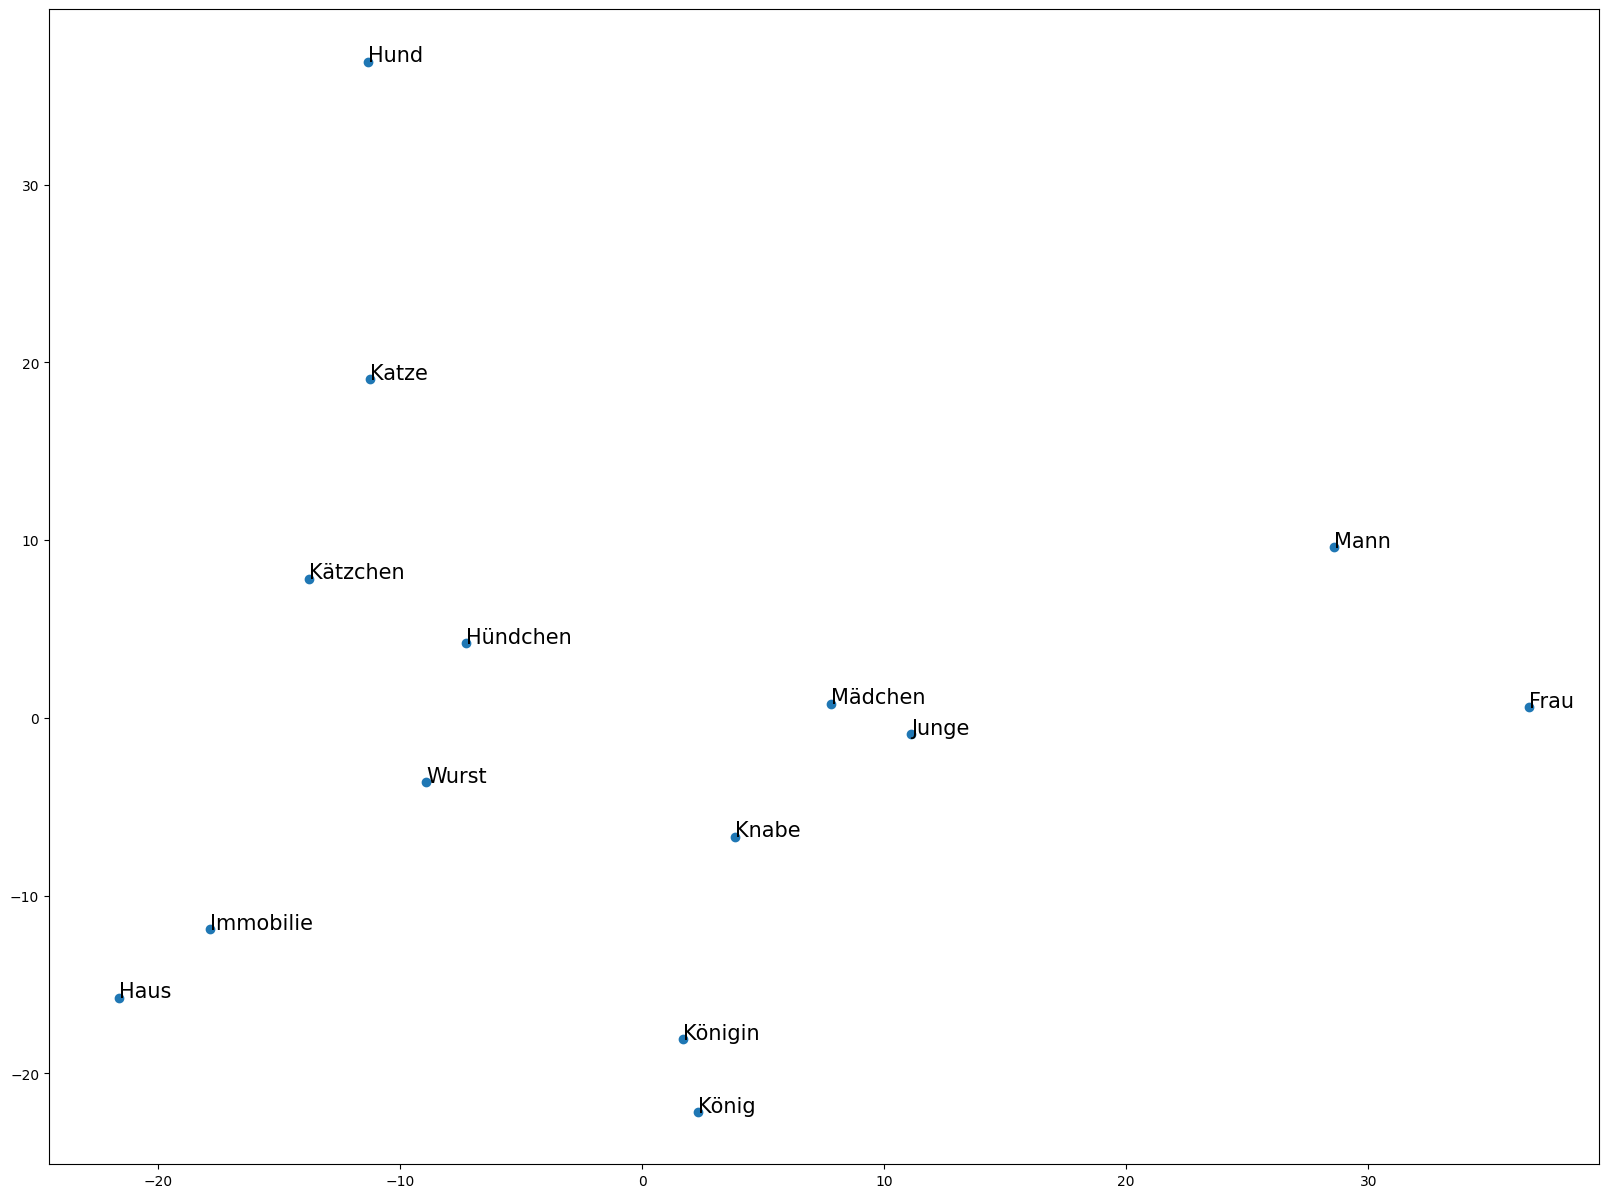

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = ["König", "Königin", "Mann", "Frau", "Katze", "Kätzchen", "Haus", "Hündchen", "Hund", "Immobilie", "Wurst", "Mädchen", "Knabe", "Junge"]

def get_word_vectors(words):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]

# intialise pca model and tell it to project data down onto 2 dimensions
pca = PCA(n_components=2)

# fit the pca model to our 300D data, this will work out which is the best 
# way to project the data down that will best maintain the relative distances 
# between data points. It will store these intructioons on how to transform the data.
pca.fit(get_word_vectors(words))

# Tell our (fitted) pca model to transform our 300D data down onto 2D using the 
# instructions it learnt during the fit phase.
word_vecs_2d = pca.transform(get_word_vectors(words))

# create a nice big plot 
plt.figure(figsize=(20,15))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()


## Toy Example Auf Satzebene

In [8]:
satz1 = nlp("Der Mann ging zur nächsten Strasse um zu Prüfen was mit der Ampelanlage kaputt war")
satz2 = nlp("Jane hatte noch nie einen Mann gesehen der so gut aussah!")
satz3 = nlp("Es gibt in der Stadtverwaltung viele Strassen die kontrolliert werden müssen")
satz4 = nlp("Ich habe keinen Bock auf Stress")

In [9]:
len(satz1.vector)

300

In [15]:
satz1.similarity(satz2)

0.4484151297248238

In [16]:
satz1.similarity(satz3)

0.4572296123334658

In [17]:
satz2.similarity(satz3)

0.30568440828642696

In [13]:
satz4.similarity(satz2)

0.5432543428079173

##  Dokumente vergleichen oder Sätze finden die sich ähneln

In [20]:
rede_weidel = u'''Sehr geehrter Herr Präsident! Liebe Kolleginnen und Kollegen!

Der Haushalt ist der Nerv des Staates. Daher muss er den profanen Augen des Untertanen entzogen werden.

Diesen Satz, der Kardinal Richelieu zugeordnet wird, haben Sie sich offensichtlich seit Jahrzehnten auf die Fahnen geschrieben; denn pünktlich zur Vorstellung des Haushaltes beginnt das Tarnen und Täuschen. Statt dem Souverän, dem Bürger, reinen Wein einzuschenken, werden vollmundige Sonntagsreden gehalten. Und dabei fühlen Sie sich dem Schriftzug am Hohen Hause „DEM DEUTSCHEN VOLKE“ ohnehin nicht mehr verpflichtet. Das Volk wollen Sie sich nämlich selbst aussuchen und zusammenstellen.

Sie reden von einer schwarzen Null – doch in Wahrheit sitzen die Steuerzahler auf einem gewaltigen Schuldenberg, den die künftigen Generationen erben werden. Dennoch binden uns die jeweiligen Finanzminister, wie gestern auch Olaf Scholz, Jahr für Jahr einen Bären auf. Wie das gelingt? Ganz einfach: Im Bundeshaushalt werden schlicht nicht alle Ausgabenposten aufgeführt. Denn: Wo ist zum Beispiel der EU-Etat zu finden? Richtig – gar nicht. Die rund 30 Milliarden Euro, die Deutschland nach Brüssel transferiert, werden im Budget verschwiegen. Nach dem Brexit wird der Posten sogar noch größer. Die Haftungen und Garantien für andere Euro-Staaten, Banken und die diversen Euro-Rettungsfonds sind gigantisch, ganz zu schweigen von den TARGET2-Salden, mit denen wir unsere Exporte nämlich selbst bezahlen.

Auch ist nur ein Teil der tatsächlichen Schulden überhaupt veröffentlicht. Es ist nämlich die Schattenverschuldung, die Sie der jüngeren Generation wie einen Mühlenstein um den Hals gehängt haben. Der Ökonom Rafelhüschen hat in seiner Generationenbilanz nachgewiesen: Auf unglaubliche 7 Billionen Euro beläuft sich die Gesamtverschuldung, die Bund, Länder und Gemeinden angehäuft haben, zuzüglich der zukünftigen Zahlungen und Verpflichtungen aus dem gesetzlichen Sozialversicherungssystem und Ihrer stattlichen Pensionen. Ich stelle die Frage: Ist das eigentlich noch verantwortliches Haushalten?

Sie reden von Verantwortung, doch in Wahrheit geben Sie das Königsrecht des Parlamentes, die Budgethoheit, schamlos aus der Hand. „No taxation without representation“ – keine Besteuerung ohne Zustimmung des Parlaments – ist Grundsatz einer jeden parlamentarischen Demokratie. Das Bundesverfassungsgericht hat ganz klar festgehalten: Als Repräsentanten des Volkes müssen die gewählten Abgeordneten des Deutschen Bundestages … die Kontrolle über grundlegende haushaltspolitische Entscheidungen behalten. Der Deutsche Bundestag darf seine Budgetverantwortung nicht durch unbestimmte haushaltspolitische Ermächtigungen auf andere Akteure übertragen. Sie haben aber dennoch den Rettungsschirmen, den dauerhaften automatisierten Finanzierungsmechanismen zugestimmt, und Sie bejubeln die Pläne von Präsident Emmanuel Macron – kein Widerspruch zum gigantischen Transfer von deutschem Steuergeld, kein Widerspruch zu einem EU-Finanzminister. Ganz im Gegenteil: Es scheint Ihnen nicht schnell genug zu gehen, Verantwortung nach Paris und Brüssel zu übertragen – und damit das Steuergeld, das Sie hier nie erarbeitet haben, sehr geehrte Damen und Herren.

Unser Haushalt ist sozial gerecht, behaupten Sie tatsächlich. Deutschland hat eine der höchsten Einkommens- und Ausgabenbelastungen aller westlichen Staaten. Durch Ihre absurde Steuerpolitik sind vor allem die Verdiener mittlerer und kleiner Einkommen, vor allem die Familien belastet. Die Steuerzahler bluten zusätzlich mit dem Abschmelzen ihrer Ersparnisse für die Zinsersparnis, die sich der Staat über die Null- und Negativzinspolitik der EZB ermöglicht. Der Staat entschuldet sich also auf Kosten der Sparer und Steuerzahler.

Und dann über die schwarze Null reden! Was ist daran gerecht, was ist daran sozial, sehr geehrte Damen und Herren? Es ist nichts anderes als Steuerzahlerausbeutung nach Gutsherrenart, was Sie hier praktizieren. Während die Infrastruktur dieses Landes zerfällt, der Staat seine Bürger nicht mehr schützen kann, fließen Abermilliarden in die Aufnahme und Alimentierung illegaler Einwanderer und in die Sozialsysteme.

Es ist erschreckend: In spätestens 20 Jahren wird jeder fünfte Rentner auf die Grundsicherung angewiesen sein. Trotz eines harten Arbeitslebens haben heute unzählige Senioren kaum genug zum Leben. Zwei Beispiele aus Bochum: Zum einen Herbert W. Bis Mitte der 70er-Jahre hat er unter Tage gearbeitet, später bei Opel, hat viele Jahre ins deutsche Rentensystem eingezahlt, sammelt am Wochenende Flaschen vor dem Ruhrstadion, um seine kümmerliche Rente aufzubessern. Zum anderen Sami A. Er ging früher auch einer beschwerlichen Arbeit nach, er war Leibwächter von Osama Bin Laden, hat nie ins deutsche Sozialsystem eingezahlt, fährt am Wochenende gern mit seinem Moped ins Grüne, erhält vom Staat 1 200 Euro pro Monat, und das seit sage und schreibe zehn Jahren. Das ist aus meiner Sicht eine himmelschreiende Ungerechtigkeit, die Sie zu verantworten haben.

Sie behaupten, der Haushalt sei zukunftsorientiert. Im Gegenteil: Sie verbauen die Chancen der zukünftigen Generationen. Das Fundament unseres Staates sind die Menschen, die hier leben und arbeiten. Es sind aber nicht nur die Menschen, die jetzt hier leben, sondern auch diejenigen, die in Zukunft hier leben werden. Ja, wir haben die Hauptverantwortung für die Menschen, die Familien, die schon länger hier leben, und diesen Menschen haben Sie zu dienen. Staatsaufgabe ist nämlich, das über Generationen aufgebaute Volksvermögen treuhänderisch zum Wohle des deutschen Volkes zu verwalten und es nicht mit vollen Händen zum Fenster rauszuschmeißen; denn Eigentümer sind die deutschen Bürger und nicht Sie, nicht die Regierung. Seit 1972 werden in Deutschland jedes Jahr weniger Kinder geboren, als Menschen sterben. Für die Überlebensfähigkeit eines leistungsfähigen Staates ist das ein Problem. Was haben Sie dagegen getan? Nichts, na ja, jedenfalls nichts Wirksames. Denn Sie setzen ausschließlich auf kompensatorische Einwanderung – das sagen Sie ja die ganze Zeit. Bei muslimischen Zuwanderern schaut die Geburtenrate nämlich ganz anders aus. Sogar die Aufettung der Einwohnerzahl durch zugewanderte Straftäter mit mehrfachen Identitäten scheint Sie überhaupt gar nicht zu stören. Doch ich kann Ihnen sagen: Burkas, Kopftuchmädchen, alimentierte Messermänner und sonstige Taugenichtse werden unseren Wohlstand, das Wirtschaftswachstum und vor allem den Sozialstaat nicht sichern. Dazu, Herr Kauder, bedarf es einer qualifizierten und keiner plan- und zügellosen, bildungsfernen Zuwanderung.

Deutschland ist schon lange ein grenzenloses Einwanderungsland für Unqualifzierte und ein Auswanderungsland für Hochqualifzierte geworden. Und was tun Sie dagegen? Wer soll in Zukunft für die Renten aufkommen? Wer zahlt denn Ihre stattlichen Pensionen, auch Ihre, Herr Hofreiter, Sie Schreihals? Ihre eingewanderten Goldstücke etwa? Das glauben Sie doch wohl nicht im Ernst. Die Bürger scheinen Ihnen vollkommen egal zu sein. Sie wollen sich darauf beschränken, den Niedergang unseres Landes zu verwalten, teilweise haben wir den Eindruck, dass Sie ihn sogar befeuern. Aber das wird wohl Ihrem Wertekanon entsprechen. Wenn eine Bundestagsvizepräsidentin einem Transparent hinterherrennt, auf dem steht „Deutschland, du mieses Stück Scheiße“, und alle hier das mittragen, indem sie zur Bundestagsvizeprä- sidentin gewählt wird – ich spreche von Claudia Roth –, dann muss man sich über nichts mehr wundern hier in diesem Hohen Haus.

Die AfD hingegen tritt für Verantwortung, Gerechtigkeit und für eine lebenswerte Zukunft ein. Deshalb fordern wir erstens einen schonungslosen Kassensturz. Alle Zahlen müssen endlich offen auf den Tisch gelegt werden.

Zweitens. Wir fordern, den Sozialstaat endlich zu sichern und die Zukunft zu gestalten. Die Strategie des Generationenersatzes durch eine ungeregelte Zuwanderung, teilweise aus frauenverachtenden Stammeskulturen, hat sich als Holzweg erwiesen. Wohlstand kann nur gesichert werden, wenn in sichere Grenzen und in die kommenden Generationen investiert wird.

Drittens. Wir wollen echte Steuergerechtigkeit. Mittel- und Geringverdiener müssen endlich ehrlich belastet werden. Dazu muss der Grundfreibetrag endlich angehoben werden. 2 000 Euro brutto im Monat steuerfrei, das wäre doch einmal visionär; denn es kann doch nicht sein, dass ein Facharbeiter bereits beim 1,3-Fachen des Durchschnittslohnes den Spitzensteuersatz zu zahlen hat. Ich kann Ihnen sagen: Es ist endlich Zeit für eine ehrliche Entlastung.

Viertens. Keine weitere Aushöhlung der Souveränität. Die Hoheit über unseren Haushalt gehört nach Berlin und nicht nach Brüssel. In diesem Sinne schließe ich mit einem Zitat des früheren tschechischen Präsidenten Zeman, das Ihnen auch schon die ehrenwerte ehemalige CDU-Abgeordnete Erika Steinbach vorgetragen hat – ich zitiere –: Falls Sie in einem Land leben, in dem Sie für das Fischen ohne Angelschein bestraft werden, jedoch nicht für den illegalen Grenzübertritt ohne gültigen Reisepass, dann haben Sie das volle Recht, zu sagen, dieses Land wird von Idioten regiert.
'''



In [21]:
rede_bernd = u'''Björn Höcke: Liebe Freunde, liebe Mitstreiter innerhalb und außerhalb unserer Partei, liebe Patrioten von nah und fern, ich bin einfach nur überglücklich heute hier bei euch in Dresden... [unv., geht in Jubel unter]

Es ist mir schon lange Zeit ein Herzensanliegen, das tun zu dürfen. Ich bin der Jungen Alternative hier in Dresden hier dankbar dafür, dass sie die Einladung ausgesprochen hat, dass sie den Mut bewiesen hat, einen unbequemen Redner einzuladen...

...Mut bewiesen hat, diese Veranstaltung, die ja wirklich eine große Veranstaltung ist, zu stemmen. Das zu leisten, das ist ein großer, schwieriger organisatorischer Akt, gerade wenn man gegen so viele Gegner zu kämpfen hat. Sie hat‘s getan. Lieber Herr Scholz [Anm.: Matthias Scholz, Vorsitzender der Jungen Alternative], herzlichen Dank für ihre Einladung, für die Einladung ihres Stadtverbandes... [unv., geht in Jubel unter]

Wir haben eine großartige Rede gehört von Markus Mohr, Stadtrat in Aachen, der ein ganz wichtiges Thema hier ausgebreitet hat, das Thema der sozialen Frage. Dazu will ich heute nichts sagen. Ich will heute würdigen, ich will hier und da auch mahnen und ich will vor allen Dingen appellieren. Wir haben zwei potentielle Bundestagskandidaten gehört, denen ich von Herzen alles, alles Gute wünsche. Ich hoffe, lieber Herr Vogel [Anm.: Stefan Vogel, AfD-Stadtratsfraktion Dresden] lieber Herr Maier [Anm.: Jens Maier, Richter am Landgericht Dresden und Direktkandidat der AfD in Dresden] sie können hier reüssieren und können in den Bundestag einziehen. So aufrechte Patrioten können... [unv., geht in Jubel unter]

Liebe Freunde, Dresden ist eine ganz besondere Stadt. Ich kann mich noch gut erinnern, wie hier im Oktober 2014 die Straßenproteste begonnen haben und ich kann mich noch sehr gut daran erinnern, wie ich mich kurze Zeit später mit einigen frisch gewählten Abgeordneten des Thüringer Landtages auf den Weg nach Dresden machte, und das [sic!] in Augenschein zu nehmen, was innerhalb von wenigen Wochen und Monaten eine weltweite Aufmerksamkeit erzwungen hatte.

Wir suchten den Beginn des Pegida-Spazierganges und wir fanden ihn nicht direkt, weil wir etwas ortsunkundig waren. Und ich kann mich noch gut erinnern, wie wir durch mehrere Gruppen von sogenannten Antifaschisten durch mussten…

...damals, damals waren wir noch unbekannt, damals war ich noch unbekannt. Heute wäre das für mich wahrscheinlich eine lebensgefährliche Aktion.

Sie können sich vorstellen wie froh ich war, als ich diese wilden Horden verlassen hatte und mit meiner kleinen Thüringer Gruppe dann endlich den Pegida-Spaziergang gefunden hatte.

Liebe Freunde, ihr dürft mir jetzt, wenn ich hier rede, nicht die Schamesröte ins Gesicht treiben.

Wir gingen dann damals nach Dresden und haben uns die Lage vor Ort angeguckt, und was wir sahen bei den Spaziergängern, das waren keine verschrobenen Sonderlinge, das waren keine wirtschaftlich Abgehängten und das waren auch keine grölenden Nazis, die wir dort antrafen. Wir haben uns dann dem Spaziergang angeschlossen. Und während dieses Spaziergangs sind wir an kreischenden, verhetzten, von induziertem Irresein gekennzeichneten jugendlichen Wirrköpfen vorbeigekommen…

...und waren einfach nur erstaunt darüber, dass diese Spaziergänger trotz dieser unflätigen Provokation dieser Wirrköpfe, trotz einer staatsgefährdenden Politik der Altparteien zu Tausenden in so vornehmer und vorbildlicher Art und Weise ihre Bürgerrechte wahrnahmen.

"Ihr Sachsen seid das große, unerreichte Vorbild"

Weil wir Patrioten dasselbe Leiden in den Knochen haben und weil wir derselben Sache dienen, möchte ich es hier nochmal in aller Öffentlichkeit und aller Deutlichkeit aussprechen: Ich persönlich, liebe Freunde, ich persönlich bin stolz auf das, was ihr in Dresden erreicht habt. Ihr Sachsen, ihr Dresdner, seid für uns Thüringer und für uns Erfurter das große, unerreichte Vorbild!

Protest gegen den Auftritt des AfD-Politikers Björn Höcke am Dienstagabend im Dresdner Ballhaus Watzke
Protest gegen den Auftritt des AfD-Politikers Björn Höcke am Dienstagabend im Dresdner Ballhaus WatzkeFOTO: ZB
Euch Dresdnern, euch Patrioten aus Sachsen gebührt das große Verdienst, und dieses große Verdienst nimmt euch niemand mehr. Es ist ein historisches Verdienst, den ersten Schritt getan zu haben. Den ersten Schritt, der notwendig war, der der Lage geschuldet war, in einer Bewegung, die eine inhaltliche Fundamentalopposition darstellt. Und dieser erste Schritt hin zur Tat ist gerade für uns Bürger doch so schwer, weil er sich, dieser Bürger – und so empfindet er es zumindest in seinem Innersten, und auch das habe ich immer wieder in vielen Gesprächen gespürt, die ich geführt habe in den letzten Monaten und Jahren – weil er sich im Innersten glaubt, gegen seinen Staat, gegen den Staat, den er doch maßgeblich trägt und den er grundsätzlich befürwortet, stellen muss.

Der Philosoph Frank Lisson hat das mal vor kurzem sehr schön beschrieben und zwar aus der Sicht eines Westdeutschen, ich zitiere: „Wer hätte als Westdeutscher vor zwanzig, dreißig Jahren noch gedacht, selber einmal vor die Gewissensfrage der ehemaligen DDR-Bürger gestellt zu werden, die da lautet: Wie habe ich mich in einem Staat zu verhalten, dessen Regierung kapitale Rechtsbrüche begeht, die Verfassung mißachtet, sich willkürlich über geltende Gesetze erhebt und im Namen einer verhängnisvollen Ideologie verantwortungslose Politik gegen das eigene Volk betreibt?“ [Anm.: Auszug aus Lisson, Frank: „Fundamentalopposition“, in „Sezession“, Nr. 75, 2016]

Diese Frage, die Frank Lisson, wie so viele Westdeutsche, gestellt hat – wir hier im Osten haben sie für uns endgültig und abschließend beantwortet, liebe Mitbürger.

Wir sagen ja! Wir sagen ja, nicht zur strukturellen Fundamentalopposition, weil wir diesen Staat ja wollen! Wir wollen ihn am Leben erhalten und wir wollen ihn stützen. Wir sagen aber ja zu einer inhaltlichen Fundamentalopposition um diesen Staat, den wir erhalten wollen, vor den verbrauchten politischen Alteliten zu schützen, die ihn nur missbrauchen um ihn abzuschaffen! Das werden wir nicht zulassen, liebe Freunde!

Dresden – und ich habe es eingangs betont und es ist meine tiefe und feste Überzeugung – Dresden ist die Hauptstadt der Mutbürger.

Und wenn ich euren Verdienst anschaue und bewerte, den ihr euch erworben habt, und die Deutschland-abschaffende Politik der Altparteien, und wenn ich heute wieder in diesem Saal wie glaube ich noch niemals zuvor seit ich in einer Partei Politik mache eine reine, ehrliche bescheidende und tief begründete Vaterlandsliebe spüre, und wenn ich mir jetzt die desolate innere und äußere Lage der Bundeshauptstadt Berlin vor Augen führe, dann meine ich, eigentlich dürfte nicht Berlin, eigentlich müsste Dresden die deutsche Hauptstadt... [unv., geht in Applaus unter]'''

In [22]:
rede_sarah = u'''Dr. Sahra Wagenknecht (DIE LINKE):

Herr Präsident! Werte Kolleginnen und Kollegen! Frau Bundeskanzlerin, Sie werden hier gleich ans Mikrofon treten und wieder ausgiebig Ihre Politik loben.

Aber wenn man sich die derzeitige Politik und die derzeitige Situation in Deutschland, in Europa und in der Welt ansieht und wenn man vor allen Dingen Ihre ganz persönliche Mitverantwortung für diese Situation in Rechnung stellt, dann fragt man sich schon, wie Sie darauf auch noch stolz sein können.

Ja, wir leben in einem reichen Land, das gute Autos und international gefragte Maschinen produziert. Aber es ist ein zutiefst gespaltenes Land. Es ist ein Land, in dem selbst fleißige Arbeit nicht mehr vor Armut schützt und in dem inzwischen die Auswahl des Elternhauses wichtiger geworden ist als die Auswahl des Berufs. Es ist ein Land, in dem kaum noch investiert wird, in dem Straßen und Brücken verrotten, in dem viele Kinder in verwahrlosten Wohngebieten aufwachsen,

(Norbert Barthle (CDU/CSU): Sprechen Sie jetzt von Afrika?)

in dem ihnen elementare Bildung vorenthalten wird.

(Michael Grosse-Brömer (CDU/CSU): Um Gottes willen! Wo leben Sie eigentlich?)

Was tun Sie, Frau Bundeskanzlerin? Statt Problemlösungen liefern Sie Taschenspielertricks, statt solider Finanzierungen liefern Sie kreative Buchführung, und statt wirtschaftspolitischer Rationalität liefern Sie okkulte Opferrituale vor Ihrer neuen Göttin, der schwarzen Null, die Ihnen trotz aller Beschwörungsformeln im nächsten Jahr wieder nicht erscheinen wird.

(Beifall bei der LINKEN - Unruhe bei der CDU/CSU)

Solide öffentliche Finanzen gibt es eben nicht ohne eine dynamische Wirtschaft. Es gibt sie nicht ohne Konsumenten, die genug Geld in der Tasche haben, um sich ein gutes Leben leisten zu können, und es gibt sie auch nicht ohne Unternehmen, die genau wegen dieser Nachfrage Anreize haben, zu investieren, statt ihr Geld zu bunkern oder ihre Aktionäre mit immer neuen Rekorddividenden glücklich zu machen. Es gibt solide öffentliche Finanzen auch nicht, wenn gerade die reichsten Familien und die größten Konzerne kaum noch einen müden Euro zur Finanzierung des Gemeinwesens beitragen und der Staat dabei wegschaut.

Und deswegen ist für mich die schwarze Null eigentlich ein Ausdruck einer Null-Kompetenz in der Wirtschaftspolitik.

Das ist das Urteil des Wirtschaftsweisen Peter Bofinger über Ihre Politik, Frau Kanzlerin. Vielleicht erinnern Sie sich auch noch, was Sie im August im schönen Lindau am Bodensee von den Wirtschaftsnobelpreisträgern zu hören bekommen haben. Ich gebe eine kleine Kostprobe:

Merkel verfolgt ... eine völlig falsche Politik.

Merkel scheint den Ernst der Lage nicht kapiert zu haben.

Merkels Rede sei eine einzige Katastrophe gewesen. Wohlgemerkt: Das ist kein Mitschnitt aus einer Mitgliederversammlung der Linken. Das waren die Urteile international renommierter Wirtschaftsnobelpreisträger über Ihre Politik, Frau Merkel. Wenn Sie vielleicht einmal zuhören könnten, vielleicht würde Ihnen das zu denken geben;

aber offensichtlich interessiert Sie das überhaupt nicht.

Weggucken, wegducken, wegreden ‑ das ist Ihr Dreiklang im Umgang mit den Gefahren und Problemen der Gegenwart.

Aber die Gefahren sind einfach zu groß und die Probleme zu ernst, als dass wir so weiter mit ihnen umgehen könnten. Die deutsche Wirtschaft stagniert. Alle Prognosen für das nächste Jahr mussten nach unten korrigiert werden.

Aus konjunkturellen wie aus prinzipiellen Gründen braucht dieses Land endlich mehr Investitionen. Sie haben nun lauthals ein Investitionsprogramm angekündigt. Aber was sieht man, wenn man in das Kleingedruckte schaut? Dann sieht man, dass nach Ihren eigenen Planungen der Anteil der Investitionsausgaben des Bundes weiter sinken soll, nämlich von aktuell 10,1 Prozent auf nur noch 8,3 Prozent im Jahr 2018. So viel wirtschaftspolitische Ignoranz kann einem wirklich die Sprache verschlagen.

‑ Sie können sich ruhig aufregen. Es wäre aber besser, wenn Sie sich nicht nur aufregen würden, sondern auch Konsequenzen ziehen würden.

Es geht nicht nur um Straßen, es geht auch nicht nur um Brücken, es geht auch um Zukunftstechnologien und Innovationen. Wer meint, dafür wird schon der Markt sorgen, der sollte sich einmal fragen, warum sich eigentlich alle wichtigen digitalen Technologien heutzutage in der Hand von US-Unternehmen befinden, die Möglichkeit zur globalen Überwachung inklusive. Nicht, weil der Markt jenseits des Atlantiks so viel besser funktioniert, sondern weil sich der Staat das zumindest früher ziemlich viel hat kosten lassen. Fast die gesamte Technologie, die heute in einem iPhone steckt, ist doch nicht in Steve Jobs Garage entwickelt worden. Die ist in staatlichen Forschungszentren entwickelt worden. Wer glaubt, dass ein fundamentaler technologischer Umbruch wie die Energiewende möglich wäre ohne massive öffentliche Investitionen in die Erforschung und Umsetzung alternativer Technologien, der hat wirklich nichts verstanden.

(Beifall bei der LINKEN - Michael Grosse-Brömer (CDU/CSU): Sie hatten doch nur Robotron! Die größten Chips der Welt!)

Aber statt über solche Fragen auch nur nachzudenken, verhandelt diese Regierung lieber über Investorenschutz. Genau genommen verhandelt sie nicht, sondern der Wirtschaftsminister führt einen unglaublichen Eiertanz auf, um der Öffentlichkeit Sand in die Augen zu streuen. Ich rede von den geplanten Freihandelsabkommen CETA und TTIP,

(Michael Grosse-Brömer (CDU/CSU): Eine große Chance! Die müssen wir schnell umsetzen!)

und ich rede von den Sondergerichten für große Konzerne, mittels derer diese Konzerne den deutschen Staat in Zukunft für jede Mindestlohnerhöhung und für jedes Umweltschutzgesetz vor den Kadi ziehen können.

Aber offensichtlich hat Herr Gabriel in seiner politischen Laufbahn nicht mehr vor, den Mindestlohn zu erhöhen oder die Umwelt zu schützen. Zumindest habe ich vernommen, dass er der Öffentlichkeit mitgeteilt hat, diese Sondergerichte ließen sich - leider, leider - nicht mehr aus dem Abkommen CETA herausverhandeln. Ja, Herr Gabriel, wenn sich diese Sondergerichte nicht mehr herausverhandeln lassen, dann muss Deutschland diese Abkommen eben ablehnen. Dann muss man CETA ablehnen, und das Gleiche gilt auch für TTIP.

Beide Abkommen haben doch im Kern nur das Ziel, Löhne, Sozialstandards und Verbraucherschutz noch weiter auf Sinkflug zu schicken und den Kapitalismus endgültig vor den Zumutungen der Demokratie zu schützen; das ist doch das, worum es bei diesen Abkommen geht. Das ist das Letzte, was wir brauchen. Denn dann kann man auf Wahlen und Parlamentarismus konsequenterweise auch ganz verzichten. Wenn wir hier im Bundestag keine Gesetze mehr machen können, die den Banken und Konzernen nicht gefallen, dann verkommt das, was wir hier tun, wirklich zu einer schlichten Theatervorstellung. Da muss ich Ihnen sagen: Für ein Theater ist dieses Haus wirklich zu teuer und am Ende vielleicht auch zu wenig unterhaltsam.

Der bekannte Ordoliberale Alexander Rüstow - vielleicht gibt es bei Ihnen noch den einen oder anderen, der ihn kennt - hat bereits vor einem halben Jahrhundert gewarnt, dass - ich zitiere -

der Staat, der damit anfängt, die Raubtiere der organisierten Unternehmerinteressen zu füttern, letzten Endes von ihnen verschlungen wird.

Gerade deshalb haben die Ordoliberalen ja immer wieder davor gewarnt, Unternehmen oder auch Banken so groß oder so mächtig werden zu lassen, dass sie die Allgemeinheit erpressen oder ihr schlicht auf der Nase herumtanzen können. Es war ihre zentrale Botschaft, dass das verhindert werden muss.

Versagt der Staat auf diesem Felde, dann ist es bald um die soziale Marktwirtschaft geschehen, war Ludwig Erhards knappe Prognose zu diesem Thema. Gerade Sie von der CDU/CSU, die Sie sich so gern auf Ludwig Erhard berufen, sollten zugeben, dass er recht behalten hat. Der Staat hat auf diesem Feld versagt. Deswegen ist es um die soziale Marktwirtschaft geschehen. Wir haben nämlich keine mehr.

Auch in Brisbane haben Sie, Frau Merkel, und auch die anderen Regierungschefs wieder auf vielen wichtigen Feldern vor den Raubtieren kapituliert: bei der Finanzmarktregulierung, beim Klimaschutz und natürlich auch bei der Bekämpfung der Steuerflucht von Konzernen. Es ist einem schon aufgefallen, wie eilig sich diese Regierung, als die Enthüllungen über die Steuersparmodelle in Luxemburg in der Presse waren, bemüht hat, zur Tagesordnung überzugehen. Nun nehme ich Ihnen ja ab, dass Sie über die Enthüllungen nicht besonders verblüfft waren. Auch ich war nicht besonders verblüfft. Es ist lange bekannt, dass es solche Steuersparmodelle gibt, und zwar nicht nur in Luxemburg, sondern auch in vielen anderen EU-Staaten. Es ist auch bekannt, dass dem deutschen Staat - dem Bund, den Ländern und auch den Kommunen - schätzungsweise 100 Milliarden Euro im Jahr entgehen, weil es solche Modelle gibt. 100 Milliarden Euro!

Die Unternehmen gehen sogar ganz offen damit um, dass sie das praktizieren. Die Deutsche Bank zum Beispiel lobt sich in ihrem Geschäftsbericht ausdrücklich dafür, dass sie durch eine, wie es vornehm heißt, vorteilhafte geografische Verteilung ihres Konzernergebnisses ihre Steuerzahlungen minimiert, sprich die Öffentlichkeit kräftig geschädigt hat. Ich finde, das muss man sich einmal auf der Zunge zergehen lassen: Eine Bank, die es ohne die Milliardenzahlungen der Steuerzahlerinnen und Steuerzahler überhaupt nicht mehr gäbe, die bankrott gewesen wäre, ist auch noch stolz darauf, dass sie solche Modelle nutzt und dadurch die Öffentlichkeit in Milliardenhöhe schädigt. Natürlich ist das kriminell.'''

In [23]:
buegeleisen_bedienungsanleitung = """
Reinigung Kunststoffteile Gerät vollständig abkühlen lassen Kunststoffteile mit einem leicht feuchten Tuch abwischen und dann trockenreiben.
Netzstecker/-kabel dabei nicht berühren, bzw. nie feucht reinigen. Bügeleisen niemals ins Wasser oder in andere Flüssigkeiten tauchen: Kurzschluss- und Stromschlaggefahr! Keine scharfen, kratzenden Gegenstände oder ätzende Chemikalien verwenden
Sohle Inox-Sohle gelegentlich mit einem Metallpflegemittel reinigen und danach gründlich abwischen  Anschliessend auf einem Tuch gut durchdampfen lassen, damit Reinigungsmittelrückstände austreten können Keine scharfe und scheuernde Reinigungsmittel verwenden
Dampfkammer
Die Dampfkammer muss regelmässig mit der «CALC-CLEAN» -Funktion gereinigt werden (bei hartem Wasser wöchentlich). Auch nach längeren Standzeiten (z.B. nach den Ferien), vor dem Bügeln Dampfkammer reinigen.  Netzstecker ziehen  Tank bis zur Hälfte mit Wasser befüllen  Dampf-Regler auf «0» stellen  Temperatur-Wählscheibe auf «MIN» drehen  Netzstecker einstecken (in der Nähe des
Spülbeckens)  Temperatur-Wählscheibe auf «MAX» drehen
und Bügeleisen aufheizen lassen  Sobald die Aufheiz-Kontrolllampe erlischt, ist
die richtige Sohlentemperatur erreicht  Bügeleisen waagrecht über Spülbecken halten  «CALC-CLEAN»-Taste drücken (Taste nicht
loslassen)  Bügeleisen hin und her bewegen
Nach einer anfänglich starken Dampfbildung spülen Wasser und Dampf, Schmutz und Kalkpartikel aus der Dampfkammer.  Gleichzeitig kann der Dampfstossknopf
« » kurz gedrückt werden.
Hinweis
vor dem nächsten Dampfstoss mindestens
5 Sekunden warten Wenn keine weiteren Partikel mehr austreten:  «CALC-CLEAN»-Taste loslassen  Temperatur-Wählscheibe auf «MIN» drehen
und Netzstecker ziehen  Bügeleisen abkühlen lassen und dann Sohle
mit einem feuchten Tuch abwischen
Sicherheits- vorschriften Vor Inbetriebnahme Bedienungsanleitung vollständig durchlesen  Den Netzstecker ziehen: vor jedem Befüllen oder Entleeren vor jedem Verlassen des Raums vor jeder Pflege oder Reinigung oder nach
dem Gebrauch Heisse Bügeleisensohle nicht berühren:
Verbrennungsgefahr  Gerät nicht unbeaufsichtigt lassen, wenn es
am Netz angeschlossen ist: Brandgefahr! Niemals am Körper befindliche
Kleidungsstücke bügeln oder Personen mit
Dampf besprühen: Verbrühungsgefahr! Personen, einschliesslich Kinder, die aufgrund ihrer physischen, sensorischen oder geistigen
Fähigkeiten oder ihrer Unerfahrenheit oder Unkenntnis nicht in der Lage sind, das Gerät sicher zu benutzen, dürfen das Gerät nicht ohne Aufsicht oder Anweisung durch eine verantwortliche Person benutzen Gerät auf eine trockene, stabile und ebene Entsorgung Fläche stellen
 Gerät nicht in der Nähe von offenen Flammen abstellen. Mindestabstand von 50 cm einhalten Stellen Sie das Gerät nicht auf oder unter entflammbare, schmelzbare Vorrichtungen und Küchenvorbauten Das Netzkabel nicht herunterhängen lassen und niemals über Ecken und scharfe Kanten ziehen oder einklemmen Netzkabel nicht über heisse Gegenstände legen oder hängen, sowie vor Öl schützen Stecker niemals mit nassen Händen oder am Netzkabel aus der Steckdose ziehen Gerät niemals am Netzkabel tragen oder ziehen Vor Reinigung des Gerätes Netzstecker ziehen und vollständig abkühlen lassen Gerät oder Kabel nie in Wasser oder andere Flüssigkeiten tauchen: Verletzungs-, Feuer- oder Stromschlag-Gefahr Kabel und Stecker regelmässig auf Beschädigungen untersuchen. Gerät nicht
mit beschädigtem Netzkabel oder Netzstecker verwenden. Defekte Kabel und Stecker sofort durch den MIGROS-Service ersetzen lassen Nur Original-Ersatzteile benutzen Gerät darf nur in Privathaushalten und in
trockenen Räumen angewendet werden Für Schäden, die durch Nichtbeachten dieser Bedienungsanleitung entstehen, wird jegliche
Haftung abgelehnt Bedienungsanleitung sorgfältig aufbewahren
und allenfalls an Nachbenutzer weitergeben Ausgediente Geräte bei einer Verkaufsstelle zur kostenlosen, fachgerechten Entsorgung abgeben Geräte mit gefährlichem Defekt sofort entsorgen und sicherstellen, dass sie nicht mehr verwendet werden können Geräte nicht mit dem Hauskehricht entsorgen (Umweltschutz!)"""

In [24]:
doc1 = nlp(rede_weidel)
doc2 = nlp(rede_bernd)
doc3 = nlp(rede_sarah)
doc4 = nlp(buegeleisen_bedienungsanleitung)

In [25]:
doc1.similarity(doc2)

0.935720677701149

In [26]:
doc1.similarity(doc3)

0.9858206351926188

In [27]:
doc2.similarity(doc3)

0.9532894971959969

In [28]:
doc4.similarity(doc3)

0.8315653670879192

In [29]:
doc4.similarity(doc2)

0.7509050913346156

In [30]:
doc4.similarity(doc1)

0.8358488946857895

- Anscheinend ähneln sich die Reden mehr als man denkt...

## Die ähnlichsten Sätze zwischen zwei Reden finden

In [39]:
doc1_sentences[0].similarity(doc1_sentences[0])

1.0

In [35]:
doc1_sentences = list(doc1.sents)
doc2_sentences = list(doc2.sents)
doc3_sentences = list(doc3.sents)

In [40]:
max = 0
top = ""
for s1 in doc1_sentences:
    for s2 in doc2_sentences:
        if s1.has_vector and s1.has_vector:
            if s1.similarity(s2) > max:
                top = [s1,s2]
                max = s1.similarity(s2)

In [41]:
max

0.9241944

In [42]:
top

[Sie wollen sich darauf beschränken, den Niedergang unseres Landes zu verwalten, teilweise haben wir den Eindruck, dass Sie ihn sogar befeuern.,
 Wir sagen aber ja zu einer inhaltlichen Fundamentalopposition um diesen Staat, den wir erhalten wollen, vor den verbrauchten politischen Alteliten zu schützen, die ihn nur missbrauchen um ihn abzuschaffen!]

In [42]:
max = 0
top = ""
for s1 in doc2_sentences:
    for s2 in doc3_sentences:
        if s1.similarity(s2) != 1:
            if s1.similarity(s2) > max:
                top = [s1,s2]
                max = s1.similarity(s2)

In [43]:
max

0.92047894

In [44]:
top

[Wir sagen aber ja zu einer inhaltlichen Fundamentalopposition um diesen Staat, den wir erhalten wollen, vor den verbrauchten politischen Alteliten zu schützen, die ihn nur missbrauchen um ihn abzuschaffen!,
 Es gibt sie nicht ohne Konsumenten, die genug Geld in der Tasche haben, um sich ein gutes Leben leisten zu können, und es gibt sie auch nicht ohne Unternehmen, die genau wegen dieser Nachfrage Anreize haben, zu investieren, statt ihr Geld zu bunkern oder ihre Aktionäre mit immer neuen Rekorddividenden glücklich zu machen.]

- Interessant :) dh. Auf Satzebene ist es nicht unbedingt aufgrund der Wordembeddings nachvollziehbar warum Sätze ähnlich sind. Es kann sein dass ähnliche Themen diskutiert werden aber es ist schwer nachzuvollziehen.